# Introducing python and Jupyter Notebook

This is an example of a Jupyter Notebook. The basic concept is that of a "notebook" containing text and programming code. You can easily edit the notebook, and run the programs and see the output of the programs within the notebook. This is a powerful paradigm that is well suited to physics research, particularly when collaborating with other people.

"Cells" in a Jupyter Notebook are rectangular areas on the page that contain either text (such as this cell) or python code (such as the trivial examples in the following few cells).

Text cells can be edited by double-clicking within the cell. Code cells can be edited by single clicking within the cell. You can also put text into a code cell as a comment by starting the line with #

Pressing shift-ENTER within a text cell will display the text. Pressing shift-ENTER within a code cell with execute the python code, and display any output below.


In [1]:
# this is a comment: python will print the result of whatever you type into a code cell
# it can do math
1 + 1

2

In [2]:
a = 1/7
print(a)

0.14285714285714285


In [27]:
# exponents
2**5

32

In [28]:
#scientific notation
3.1E-2

0.031

In [62]:
# it will also evaluate logical statements
1==1

True

In [63]:
1>2

False

In [64]:
# you can use these in if/else statements:
b=8
if b>5:
    print('b is greater than five')
else:
    print('b is less than five')

b is greater than five


## Case sensitivity

python cares whether letters are capitalised. The variables above are called 'a' and 'b', but 'A' and 'B' are entirely different (currently not defined) variables. If you want to read in a file called 'flight_variables.txt' but you ask for 'Flight_Variables.txt', it will not find your file.

In [65]:
A

NameError: name 'A' is not defined

## Libraries

When you first start up python, it already has quite a number of tools available. Its *standard library* is pretty large.

However, there are a number of mathematical operations and data types that are important for working with data that are not part of the standard library. These were installed as part of Anaconda, and once you *import* them, you can use them.

Some libraries have sub-libraries for specific purposes, and you can import just the sub-library if that's all you want.

It is good style to do all of your imports in one cell at the start of your notebook.

# Importing libraries works like this

## If you want the whole library to be directly available:

In [5]:
import pandas
# (pandas is a very useful library of data analysis tools)

## That's not a great idea, because now every routine in the 'pandas' library is available in your *namespace* (the list of all available routines and variables), and if any of them share a name with a routine or a variable that was already available, now they conflict. Which one should python use?

## The better thing is to import a library into a specific name, and then call its routines relative to it:

In [6]:
import numpy as np
# (numpy is an essential set of mathematical tools)

In [7]:
# Now all routines in numpy can be accessed like this:
print(np.pi, np.abs(np.sin(np.pi/3)), np.mean([1,3,5,7,9]))

3.141592653589793 0.866025403784 5.0


## And if you're not sure what routines are available in numpy, or what the one you want is called, jupyter will show you a list if you type 'np.' and then press the tab key. (this is true for all libraries, not just numpy)

In [ ]:
np.

## You can also import just a sub-library if that's all you need:

In [8]:
import matplotlib.pyplot as plt
# (matplotlib.pyplot is the library you need for almost all plots and figures. It has nearly 
# endless options)
%matplotlib inline
# this command (also an essential) makes your matplotpib.pyplot figures show up in your 
# notebook

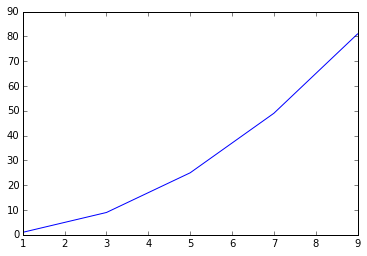

In [9]:
plt.plot([1,3,5,7,9],[1,9,25,49,81])

# Using "Markdown" to enter text and equations

Text cells, such as this one, contain normal text such as the words in this sentence, with a few non-alphabetic characters used for special formating such as headings, italics, dot points, and mathematics. 

The special formatting is called "Markdown".

Double-click somewhere in this cell to see the Markdown source for the cell. You can then press CTRL-ENTER to process the Markdown into displayed text.

Here are some examples of Markdown:

# To create a big heading, begin the line with a single hash

## More hashes produce 

### smaller

#### and smaller headings

* a dot point starts with an asterisk
* here is another dot point
* **bold text is delimited by double asterisks** like `**this**`
* *Italic text uses single asterisks*
* **_bold italic_ is delimited by underscores within double asterisks** like `**_this_**`

Here is some in-line LaTeX for mathematics: $\pi\approx3.14159$

```
If you want a block of text to appear verbatim with a monospaced
font, enclose the text with lines containing triple opening single quotes.
Note that Markdown processing is suspended in verbatim mode,
so you can type $\pi$ and **bold** and have them displayed without interpretation
```

Block quotes can be useful, as Richard Feynman said:

> For a successful technology, reality must take precedence over public relations,
> for Nature cannot be fooled.

Hyperlinks are easy, e.g, here is [my homepage](http://www.phys.unsw.edu.au/~mcba).

An enumerated list:
1. Uno
2. Dos
3. Tres
  1. Indent by two spaces
  2. for this effect
    1. And another two spaces
    2. for another level of indentation
    
Here is the black body function as a equation on a separate line: $$b_\nu={2h\nu^3\over{c^2}}{1\over{\exp\bigl({h\nu\over{kT}}\bigr)-1}}$$

Images can be easily inserted too:

![my image](http://www.phys.unsw.edu.au/~mcba/sfdsc06640.jpg)

## Data types

python has a rich set of data types, suitable for different situations and purposes.

In [67]:
t = 4 # integers
a = 1.234 # floating-point numbers
b = 1.2 + 3.4j # complex numbers
c = 'SCIF is an acronym' # strings; immutable
d = [1, 2, 3, ['arbitrary content', 1.2 + 3.4j]] # lists of things; mutable ordered collections of arbitrary objects
e = (1, 'red', 1.2 + 3.4j, {}) # tuples; immutable ordered collections of arbitrary objects
f = {'red' : 1, 'green' : 2} # dictionaries; mutable mappings (no concept of order)
g = {'a', 'b', 2, (1, 2)} # sets; mutable unordered collections of unique and immutable objects

print(t, a, b * 2, c.upper(), d[3], e[3:-1:-1], f['green'], g, 'b' in g)

4 1.234 (2.4+6.8j) SCIF IS AN ACRONYM ['arbitrary content', (1.2+3.4j)] () 2 {(1, 2), 2, 'a', 'b'} True


## Note the concepts of *mutable* (i.e., object that can be changed), and *immutable* (object that can not be changed). Some data types are ordered (e.g, lists, tuples), but for other data types an order doesn't make sense (dictionaries, sets). 

## Arrays

To get one-dimensional or multidimensional arrays of numbers, you need to use np.array or np.ndarray:

In [14]:
arr1=np.array([8,7,6,5,4,3,2])
print(arr1)

[8 7 6 5 4 3 2]


In [18]:
arr2=np.array([[1,2,3,4,5],[1,4,9,16,25],[1,16,81,256,525]])
print(arr2)

[[  1   2   3   4   5]
 [  1   4   9  16  25]
 [  1  16  81 256 525]]


## You can convert a list of numbers into a numpy array, which allows you to do mathematical operations on it:

In [21]:
list1=[17,13,11,7,5,3,2]
arr3=np.array(list1)
print(arr3, arr3**2)

[17 13 11  7  5  3  2] [289 169 121  49  25   9   4]


## You can also generate an array of all zeroes, all ones, all integers from zero to n-1, or n points between two limits:

In [72]:
arr4=np.zeros((2,3))
print(arr4)

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [74]:
arr5=np.ones((5,2))
print(arr5)

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]


In [76]:
seq1=np.arange(10)
print(seq1)

[0 1 2 3 4 5 6 7 8 9]


In [79]:
seq2=np.linspace(30,40,21)
print(seq2)

[ 30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40. ]


## Indexing and slicing

With ordered data types like lists and arrays, you can retrieve subsets by their *index*: where they are in the list or array. python indexing starts at zero.

In [33]:
arr3

array([17, 13, 11,  7,  5,  3,  2])

In [44]:
arr3[0]
# element 0, the first element in the array

17

In [38]:
arr3[4]

5

In [40]:
arr3[-1]
# last element

2

## When you select a range of indices from i to j, python gives you back elements i through j-1:

In [57]:
arr3[0:1]
# square brackets are required for selecting a subset

array([17])

In [45]:
arr3[3:5]

array([7, 5])

## If you want to select all the way to one end of the array, you can leave that part blank and python will understand what you mean:

In [41]:
arr3[2:]

array([11,  7,  5,  3,  2])

In [42]:
arr3[:4]

array([17, 13, 11,  7])

## Selecting subsets works in multiple dimensions too:

In [46]:
arr2

array([[  1,   2,   3,   4,   5],
       [  1,   4,   9,  16,  25],
       [  1,  16,  81, 256, 525]])

In [48]:
arr2[0,:]

array([1, 2, 3, 4, 5])

In [49]:
arr2[:,1]

array([ 2,  4, 16])

In [50]:
arr2[2,1:4]

array([ 16,  81, 256])

## Loops

If you want to re-run a piece of code while changing an input variable, a *for* loop is what you want. If you want to repeat a piece of code until a certain condition is met, use a *while* loop. Loops can be nested insie other loops.

In [58]:
for i in range(0,10):
    h=(i*3)+7
    print(h)

7
10
13
16
19
22
25
28
31
34


In [60]:
i=0
while i<25:
    print(i)
    i=i+4

0
4
8
12
16
20
24


## Indentation

python pays attention to whether your code is indented. Indentation by one tab is required inside a loop or an if statement. Jupyter will automatically indent text after a line with 'for', 'while', 'if', 'else' in it. Going back to no indentation indicates that the loop or if statement is finished; there is no 'endif' or 'endfor'.

## Here are some example calculations, loops and plots:

In [10]:
import math

# Fundamental constants.

planck = 6.626e-34
boltzmann = 1.381e-23
c = 2.998e8

# Input variables.

wavelength = 2.35e-6
t = 273.15 - 40

# Derived variables.

nu = c / wavelength

# The black-body formula.

bb = (2 * planck * nu**3)/(c**2 * (math.exp((planck * nu)/(boltzmann * t)) - 1.0))

print("bb = ", bb, " W m-2 sr-2 Hz-1")

# Convert to "radio astronomer's units" using Jansky = 1E-26 W m-2 Hz-1, and the
# steradian is 4.254E10 square arcseconds.

bb *= 1.0E6 / (4.254E10 * 1.0e-26)
print("bb = ", bb, " uJy per sq arcsecond")


bb =  1.2139154530564587e-19  W m-2 sr-2 Hz-1
bb =  285.3585926319837  uJy per sq arcsecond


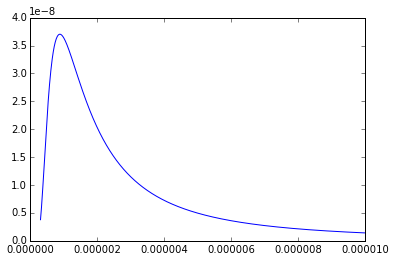

In [11]:
t = 5800.0
wavelength = np.arange(0.3e-6, 10e-6, 0.01e-6)

nu = c / wavelength

bb = (2 * planck * nu**3)/(c**2 * (np.exp((planck * nu)/(boltzmann * t)) - 1.0))

plt.plot(wavelength, bb)
plt.show()

59


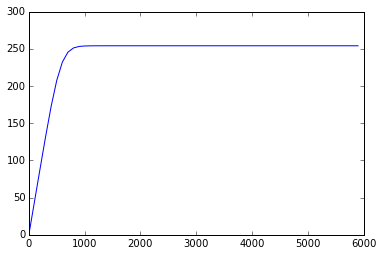

In [29]:
import matplotlib.pyplot as plt

nSteps = int(input(""))

timeStep = 100           # years
waterDepth = 4000        # meters
L = 1350                 # Watts/m2
heatCapacity = 1.6884E10 # J/K m2
albedo = 0.3
epsilon = 1
sigma = 5.67E-8          # W/m2 K4

time = [0]
T = [0]
heatContent = T[0] * heatCapacity

for i in range(0, nSteps):
    heatContent += (L * (1 - albedo) / 4 - epsilon * sigma * pow(T[-1], 4)) * timeStep * 365.25 * 24 * 3600
    T.append(heatContent / heatCapacity)
    time.append(time[-1] + timeStep)
    heatOut = sigma * pow(T[-1], 4)

#print(T[-1], heatOut)
plt.plot(time, T)
plt.show()